In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [14]:
df_met = pd.read_csv('../data/xls_Bulath/Bullath_metadata.csv',sep = '\t')
df_smb      = pd.read_excel('../data/xls_Bulath/Bullath_all.xls', header=None)
smb_data    = df_smb.values[:,1:-1]
smb_time    = df_smb.values[:,0]
df_smb.columns = df_met.Name_orig

In [15]:
df_smb

Name_orig,Date,R1,R1А,R2,R3,R4,R5,R6,R7,R8,...,9N,AN,BN,CN,DN,EN,FN,GN,IN,JN
0,2007-11-08,68.80,76.800,89.600,69.600,36.800,51.600,60.800,67.600,70.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2007-11-20,NaN,NaN,NaN,NaN,37.200,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2007-11-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2007-12-09,75.84,85.320,102.858,77.736,43.608,58.302,67.782,84.846,92.430,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2007-12-18,73.73,86.355,102.515,78.780,40.400,59.085,69.185,92.415,93.930,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,2012-02-04,-46.00,-44.120,-9.020,0.000,-10.660,9.820,102.128,125.696,112.439,...,79.37,14.79,12.33,0.00,50.779,-22.96,-34.88,37.961,68.034,12.325
105,2012-02-19,-68.50,-65.720,-19.300,-12.300,-18.760,0.000,92.780,130.806,108.498,...,71.20,6.38,7.37,1.08,35.843,-19.36,-53.78,30.442,52.046,3.928
106,2012-03-04,-98.20,-89.120,-45.620,-19.680,-31.360,-9.020,96.240,142.829,117.083,...,80.92,0.00,-16.40,-29.52,29.424,-55.36,-67.28,15.325,55.170,-3.280
107,2012-03-17,-130.60,-115.220,-70.820,-35.880,-51.160,-20.500,76.310,120.312,98.590,...,59.04,-13.12,-33.62,-47.56,-2.460,-82.36,-83.48,-4.920,29.521,-18.860


In [16]:
smb_coll = []
for i in df_met.Name_orig[1:]:
    subset = (df_smb[['Date', i]])
    subset.rename(columns = {i:'SMB'},  inplace=True)
    subset['Stake'] = i
    g_met = df_met.loc[lambda df_met: df_met['Name_orig'] == i, :]
    subset['Latitude']  = float(g_met.Latitude.values)
    subset['Longitude'] = float(g_met.Longitude.values)
    subset['Elevation'] = float(g_met.Elevation.values)
    subset.dropna(inplace=True)
    subset = subset[['Stake', 'Date', 'Latitude', 'Longitude', 'Elevation', 'SMB']]
    subset['SMB'] = subset['SMB']/100
    smb_coll.append(subset)

In [17]:
smb_coll_df = pd.concat(smb_coll, ignore_index=True)

In [18]:
smb_coll_df

Name_orig,Stake,Date,Latitude,Longitude,Elevation,SMB
0,R1,2007-11-08,-62.177620,-58.902406,82.0,0.68800
1,R1,2007-12-09,-62.177620,-58.902406,82.0,0.75840
2,R1,2007-12-18,-62.177620,-58.902406,82.0,0.73730
3,R1,2007-12-26,-62.177620,-58.902406,82.0,0.65472
4,R1,2008-01-05,-62.177620,-58.902406,82.0,0.44000
...,...,...,...,...,...,...
2560,JN,2012-02-04,-62.152849,-58.877932,231.0,0.12325
2561,JN,2012-02-19,-62.152849,-58.877932,231.0,0.03928
2562,JN,2012-03-04,-62.152849,-58.877932,231.0,-0.03280
2563,JN,2012-03-17,-62.152849,-58.877932,231.0,-0.18860


In [19]:
df_s = smb_coll_df.sort_values(by=['Elevation', 'Date'])
df_s.index = df_s.Date
df_s['Year'] = df_s.index.year

In [20]:
labels = df_s.drop_duplicates(subset=['Stake'])
labels

Name_orig,Stake,Date,Latitude,Longitude,Elevation,SMB,Year
Date,,,,,,,
2008-01-05,R15,2008-01-05,-62.178873,-58.907921,54.0,0.49203,2008
2007-11-08,R1,2007-11-08,-62.177620,-58.902406,82.0,0.68800,2007
2008-02-17,R13,2008-02-17,-62.170879,-58.858596,84.0,0.00000,2008
2008-01-05,DN,2008-01-05,-62.154086,-58.917417,88.0,0.35070,2008
2008-01-05,6N,2008-01-05,-62.180384,-58.887440,91.0,0.60137,2008
2007-11-08,R1А,2007-11-08,-62.176964,-58.900501,96.0,0.76800,2007
2008-01-05,EN,2008-01-05,-62.153974,-58.913148,108.0,0.21042,2008
2008-01-05,CN,2008-01-05,-62.164730,-58.913885,110.0,0.86673,2008
2007-11-08,R2,2007-11-08,-62.176363,-58.898504,116.0,0.89600,2007


In [21]:
label_year = df_s.drop_duplicates(subset=['Year']).sort_values(by=['Year'])['Year'].values
label_year

array([2007, 2008, 2009, 2010, 2011, 2012])

In [22]:
smb_sea = []
for j in labels['Stake'][0:]:
    stake = df_s.loc[lambda df: df['Stake'] == j, :]
    
    for i in label_year[:-1]:
        time1_w = str(i)+'1001'
        time2_w = str(i+1)+'0331'
        smb_sea.append(stake[time1_w:time2_w])

In [23]:
smb_sea_t = pd.concat(smb_sea)
smb_sea_t.reset_index(drop=True, inplace=True)

In [24]:
smb_sea_t

Name_orig,Stake,Date,Latitude,Longitude,Elevation,SMB,Year
0,R15,2008-01-05,-62.178873,-58.907921,54.0,0.49203,2008
1,R15,2008-01-26,-62.178873,-58.907921,54.0,0.26200,2008
2,R15,2008-02-02,-62.178873,-58.907921,54.0,0.23310,2008
3,R15,2008-02-09,-62.178873,-58.907921,54.0,0.18954,2008
4,R15,2008-02-17,-62.178873,-58.907921,54.0,-0.01600,2008
...,...,...,...,...,...,...,...
2034,9N,2012-02-04,-62.166223,-58.883543,261.0,0.79370,2012
2035,9N,2012-02-19,-62.166223,-58.883543,261.0,0.71200,2012
2036,9N,2012-03-04,-62.166223,-58.883543,261.0,0.80920,2012
2037,9N,2012-03-17,-62.166223,-58.883543,261.0,0.59040,2012


In [25]:
smb_sea_t0 = []
for j in labels['Stake'][0:]:
    stake = smb_sea_t.loc[lambda df: df['Stake'] == j, :].copy()
    date0 = stake[0:1].copy()
    date0['SMB'] = 0
    if date0['Year'].values == 2007:
        date0['Date'] = np.datetime64('2007-05-01')
    else:
        date0['Date'] = np.datetime64('2007-05-01')
    smb_sea_t0.append(date0)
    smb_sea_t0.append(stake)

In [26]:
smb_sea_t = pd.concat(smb_sea_t0)

In [27]:
date_1 = []
for j in labels['Stake'][0:]:    
    stake = smb_sea_t.loc[lambda df: df['Stake'] == j, :].copy()
    date_1.append(stake['Date'].values[0])
    for i in stake.Date[0:-1]:
        date_1.append(i)

In [28]:
smb_sea_t['Date1'] = date_1

In [29]:
smb_sea_t['Days'] = (smb_sea_t['Date'] - smb_sea_t['Date1']).dt.days

In [30]:
smb_coll_df1 = smb_sea_t[['Stake', 'Date', 'Date1', 'Latitude', 'Longitude', 
                          'Elevation', 'Days','SMB']]

In [31]:
smb_coll_df1

Name_orig,Stake,Date,Date1,Latitude,Longitude,Elevation,Days,SMB
0,R15,2007-05-01,2007-05-01,-62.178873,-58.907921,54.0,0,0.00000
0,R15,2008-01-05,2007-05-01,-62.178873,-58.907921,54.0,249,0.49203
1,R15,2008-01-26,2008-01-05,-62.178873,-58.907921,54.0,21,0.26200
2,R15,2008-02-02,2008-01-26,-62.178873,-58.907921,54.0,7,0.23310
3,R15,2008-02-09,2008-02-02,-62.178873,-58.907921,54.0,7,0.18954
...,...,...,...,...,...,...,...,...
2034,9N,2012-02-04,2012-01-20,-62.166223,-58.883543,261.0,15,0.79370
2035,9N,2012-02-19,2012-02-04,-62.166223,-58.883543,261.0,15,0.71200
2036,9N,2012-03-04,2012-02-19,-62.166223,-58.883543,261.0,14,0.80920
2037,9N,2012-03-17,2012-03-04,-62.166223,-58.883543,261.0,13,0.59040


<AxesSubplot:>

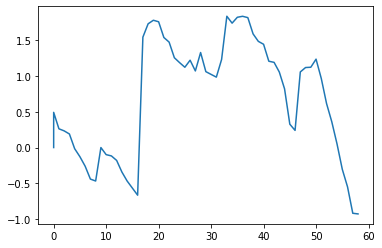

In [35]:
smb_coll_df1.loc[lambda df: df['Stake'] == 'R15', :]['SMB'].plot()

In [32]:
#smb_coll_df1.to_csv('../data/SMB_bellin_oct_mar.csv', index=False, sep='\t')